<a href="https://colab.research.google.com/github/LIONPANJSHIR/ML/blob/main/Mod%C3%A9lisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
df = pd.read_csv("/Algerian_forest_fires_dataset_cleaned.csv")
df.drop(["day","month"],axis=1,inplace=True)

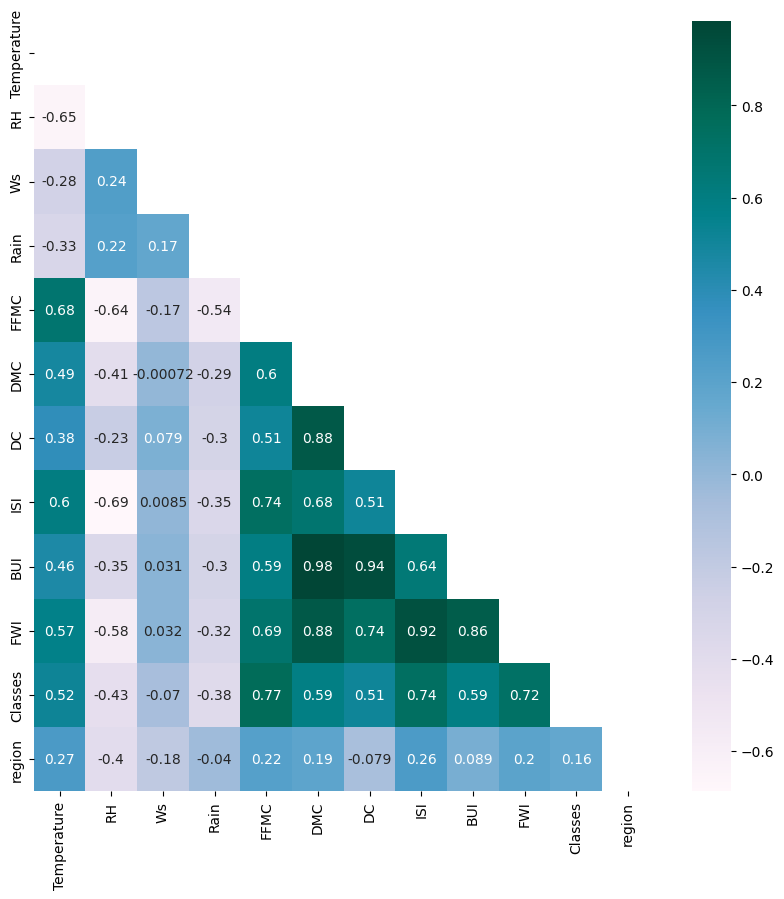

In [111]:
## Features selection
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
mask=np.triu(df.corr())
sns.heatmap(df.corr(),annot=True,mask=mask ,cmap ="PuBuGn")
plt.show()

## Interpretation of the Correlation Heatmap

The heatmap shows the correlation coefficients between the different features in the dataset. The values range from -1 to 1, where:

*   **1** indicates a perfect positive correlation (as one feature increases, the other increases proportionally).
*   **-1** indicates a perfect negative correlation (as one feature increases, the other decreases proportionally).
*   **0** indicates no linear correlation.

From the heatmap, we can observe:

*   `FWI` (Fire Weather Index) has a strong positive correlation with `ISI`, `BUI`, `DC`, and `DMC`. This indicates that as these components of the FWI increase, the FWI also tends to increase.
*   `Classes` (Fire occurrence) has a strong positive correlation with `FWI`, `ISI`, `BUI`, `DC`, and `DMC`. This suggests that these features are good indicators of fire occurrence.
*   `Rain` has a negative correlation with most other features, which is expected as rain tends to decrease fire risk.
*   `Temperature` shows a moderate positive correlation with several features like `FFMC`, `ISI`, and `BUI`.
*   `RH` (Relative Humidity) has a negative correlation with many features, which is also expected as higher humidity reduces fire risk.

This analysis helps in understanding the relationships between features and can be useful for feature selection and model building.

In [112]:
df.drop(["DMC","ISI"],axis=1,inplace =True)

In [113]:
X = df.drop("FWI" , axis =1)
y = df["FWI"]

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardization

In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Lineaire regression

In [116]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
reg = linear_model.LinearRegression()
reg.fit(X_train_scaled,y_train)
y_pred = reg.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 1.6463573971851515
Mean Squared Error (MSE): 4.934839026806492
R-squared (R2): 0.8371792794202599


## Lasso

In [117]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
reg = Lasso()
reg.fit(X_train_scaled,y_train)
y_pred = reg.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 2.0748672866021067
Mean Squared Error (MSE): 7.046070948065638
R-squared (R2): 0.7675210188644304


# Ridge

In [118]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
reg = Ridge()
reg.fit(X_train_scaled,y_train)
y_pred = reg.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 1.6533185166668916
Mean Squared Error (MSE): 5.058161148413476
R-squared (R2): 0.8331103733030799


## Elasticnet Regression

In [119]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
reg = ElasticNet()
reg.fit(X_train_scaled,y_train)
y_pred = reg.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 2.3748765083821244
Mean Squared Error (MSE): 8.58716156196623
R-squared (R2): 0.7166740747450902


### Hyperparametre tunning

In [120]:
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV
lasso_cv = LassoCV(cv=5, random_state=0, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)
y_pred_lasso_cv= lasso_cv.predict(X_test_scaled)
# lasso_cv.alpha_  best alpha
mse_lasso_cv = mean_squared_error(y_test, y_pred_lasso_cv)
mae_lasso_cv = mean_absolute_error(y_test, y_pred_lasso_cv)
r2_lasso_cv = r2_score(y_test, y_pred_lasso_cv)
print("Mean Squared Error (MSE):", mse_lasso_cv)
print("Mean Absolute Error (MAE):", mae_lasso_cv)
print("R-squared (R2):", r2_lasso_cv)

Mean Squared Error (MSE): 4.996616766978999
Mean Absolute Error (MAE): 1.645618951125539
R-squared (R2): 0.8351409766273956


In [121]:
# lasso_cv.alphas_ # les 100 alphas testé
# lasso_cv.mse_path_ # Mse de chaque alpha

ridge = RidgeCV(cv=5)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Mean Squared Error (MSE):", mse_ridge)
print("Mean Absolute Error (MAE):", mae_ridge)
print("R-squared (R2):", r2_ridge)
#

Mean Squared Error (MSE): 4.945066823432509
Mean Absolute Error (MAE): 1.6458590057628568
R-squared (R2): 0.8368418221683526


In [122]:
# lasso_cv.alphas_ # les 100 alphas testé
# lasso_cv.mse_path_ # Mse de chaque alpha

ElasticNet = ElasticNetCV(cv=5)
ElasticNet.fit(X_train_scaled, y_train)
y_pred_ridge = ElasticNet.predict(X_test_scaled)
mse_elastcv = mean_squared_error(y_test, y_pred_ridge)
mae_elastcv = mean_absolute_error(y_test, y_pred_ridge)
r2_elastcv = r2_score(y_test, y_pred_ridge)
print("Mean Squared Error (MSE):", mse_elastcv)
print("Mean Absolute Error (MAE):", mae_elastcv)
print("R-squared (R2):", r2_elastcv)

#

Mean Squared Error (MSE): 5.156336278332265
Mean Absolute Error (MAE): 1.6820070414090218
R-squared (R2): 0.8298711702997894
